In [2]:
import sys
import matplotlib.pyplot as plt

from flowplot import getNZ
from flowplot.flow import *
from flowplot.plots import *

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 10
rcParams['font.size'] = 13
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
rcParams['xtick.top']=True
rcParams['ytick.right']=True

In [4]:
flowpaths, flowtimes, flowtemps = ScanDir('/home/mjacobi/Winnet/runs/Reb_fl/runs/run_137/flow/')
print(f'{len(flowpaths)} flowfiles')

1949 flowfiles


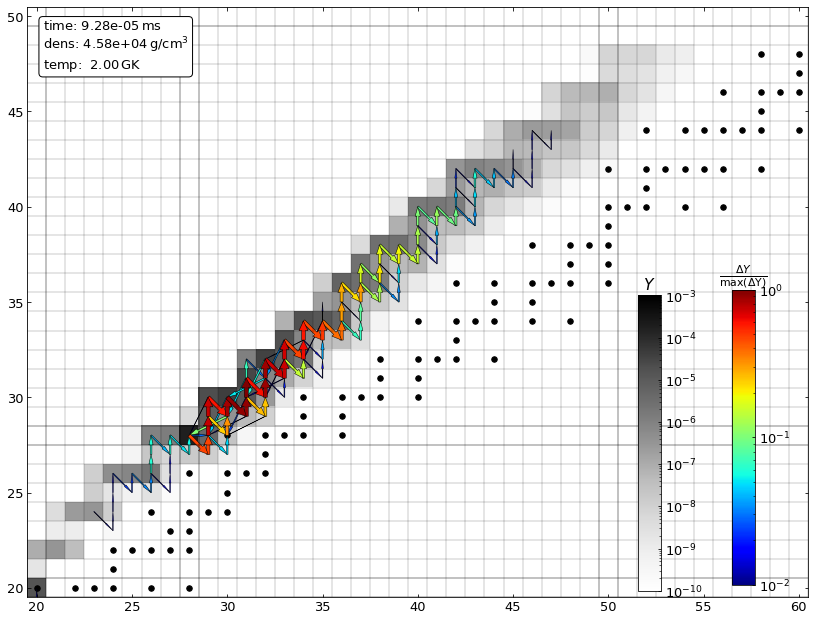

In [5]:
fig, ax = plt.subplots(1, figsize=(14,14))
ind = np.argmin(np.abs(flowtemps - 2))
plotFlowFile(ax, flowpaths[ind])
ax.axis([19.5, 60.5, 19.5, 50.5])
plt.show()

In [6]:
mask = (flowtemps < .4)
paths = flowpaths[mask][::10]
print(f'reading in {len(paths)} FlowFiles')
int_flows = IntegrateFlows(paths)

reading in 91 FlowFiles
Done: 1999 Flows on 606 Nuclei


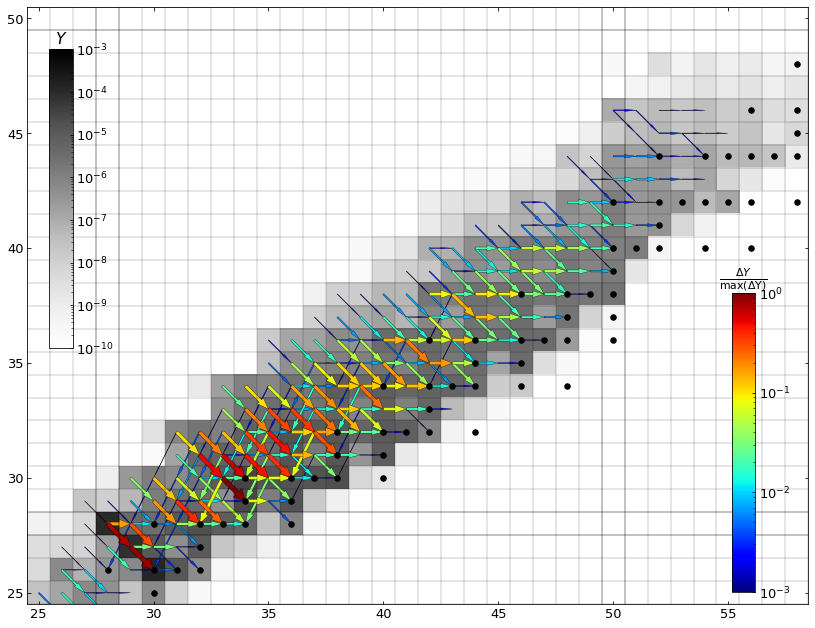

In [6]:
fig, ax = plt.subplots(1, figsize=(14,14))
plotMagicNumbers(ax)
isos = IsotopeCollectionPlot(ax, int_flows, cmap='Greys')
arrows = FlowCollectionPlot(ax, int_flows, frange=3)
plotStableIsotopes(ax)
arrows.addColorBar()
isos.addColorBar(xshift=.02, yshift=-.06, loc='upper left')
ax.axis([24.5,58.5,24.5,50.5])
plt.show()

In [7]:
subcMo92 = int_flows.getFlowsTo('mo92', 3)
subcMo94 = int_flows.getFlowsTo('mo94', 3)
subcRu92 = int_flows.getFlowsFrom('Ru92', 3)
subcRu93 = int_flows.getFlowsFrom('Ru93', 3)

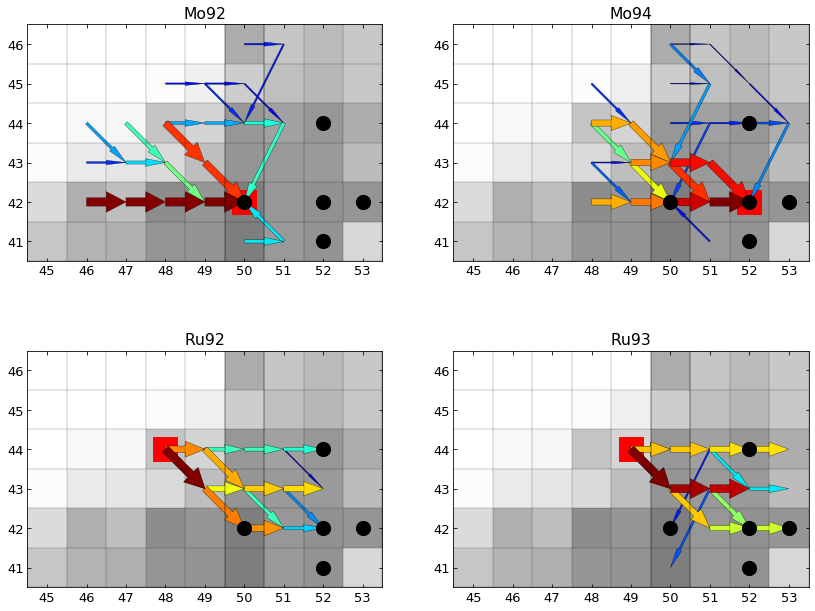

In [8]:
fig, axes =plt.subplots(2, 2, figsize=(14, 11))
for ax, subc, title in zip(axes.flatten(), [subcMo92, subcMo94, subcRu92, subcRu93], ['Mo92', 'Mo94', 'Ru92', 'Ru93']):
    iso = IsotopeCollectionPlot(ax, subc, cmap='Greys')
    N, Z = getNZ(title.lower()) 
    ax.scatter([N],[Z], c='r', marker='s', s=600)
    flo = FlowCollectionPlot(ax, subc, frange=3)
    plotStableIsotopes(ax, s=200)
    plotMagicNumbers(ax)
    ax.set_title(title)
    ax.axis([44.5, 53.5, 40.5, 46.5])